In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

In [ ]:
epochs = []
accuracies = []
times = []

In [ ]:
class TimingAndAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.start_time
        epochs.append(epoch + 1)
        accuracies.append(logs['val_accuracy'])  # Track validation accuracy
        times.append(epoch_time)
        if logs['val_accuracy'] >= 0.92:
            print(f"Desired validation accuracy of 99% reached at epoch {epoch + 1}. Stopping training.")
            self.model.stop_training = True

    def on_train_begin(self, logs=None):
        self.start_time = time.time()

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28,28,1) ),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test),
                    callbacks=[TimingAndAccuracyCallback()])

Epoch 1/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3949 - accuracy: 0.8599 - val_loss: 0.3295 - val_accuracy: 0.8801
Epoch 2/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2658 - accuracy: 0.9033 - val_loss: 0.2682 - val_accuracy: 0.8988
Epoch 3/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2209 - accuracy: 0.9184 - val_loss: 0.2542 - val_accuracy: 0.9067
Epoch 4/100
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1871 - accuracy: 0.9313 - val_loss: 0.2721 - val_accuracy: 0.9028
Epoch 5/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1606 - accuracy: 0.9412 - val_loss: 0.2650 - val_accuracy: 0.9079
Epoch 6/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1366 - accuracy: 0.9488 - val_loss: 0.2389 - val_accuracy: 0.9209


Text(0.5, 1.0, 'Validation Accuracy vs. Time')

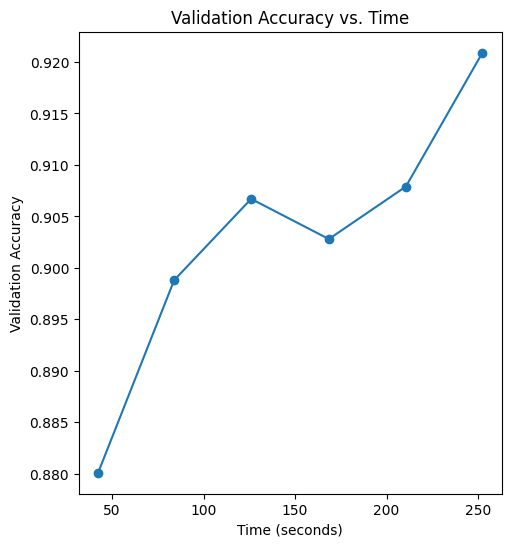

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(times, accuracies, marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Time')

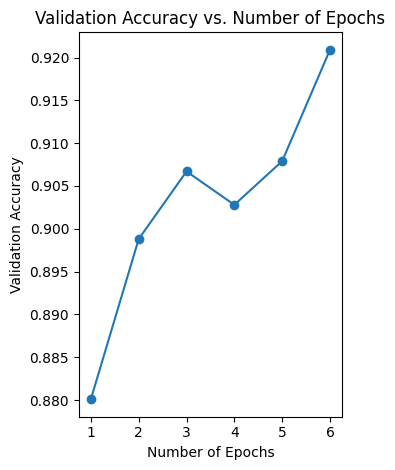

In [ ]:
# Plot Accuracy vs. Number of Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Epochs')

plt.tight_layout()
plt.show()